### Import analysis and visualization libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the data and explore the dataframe

Create a new dataframe, h, which will store the USA_housing.csv file

In [3]:
h = pd.read_csv('USA_housing.csv')

In [4]:
h.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [5]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
h.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [7]:
h.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [8]:
sns.set_style('whitegrid')

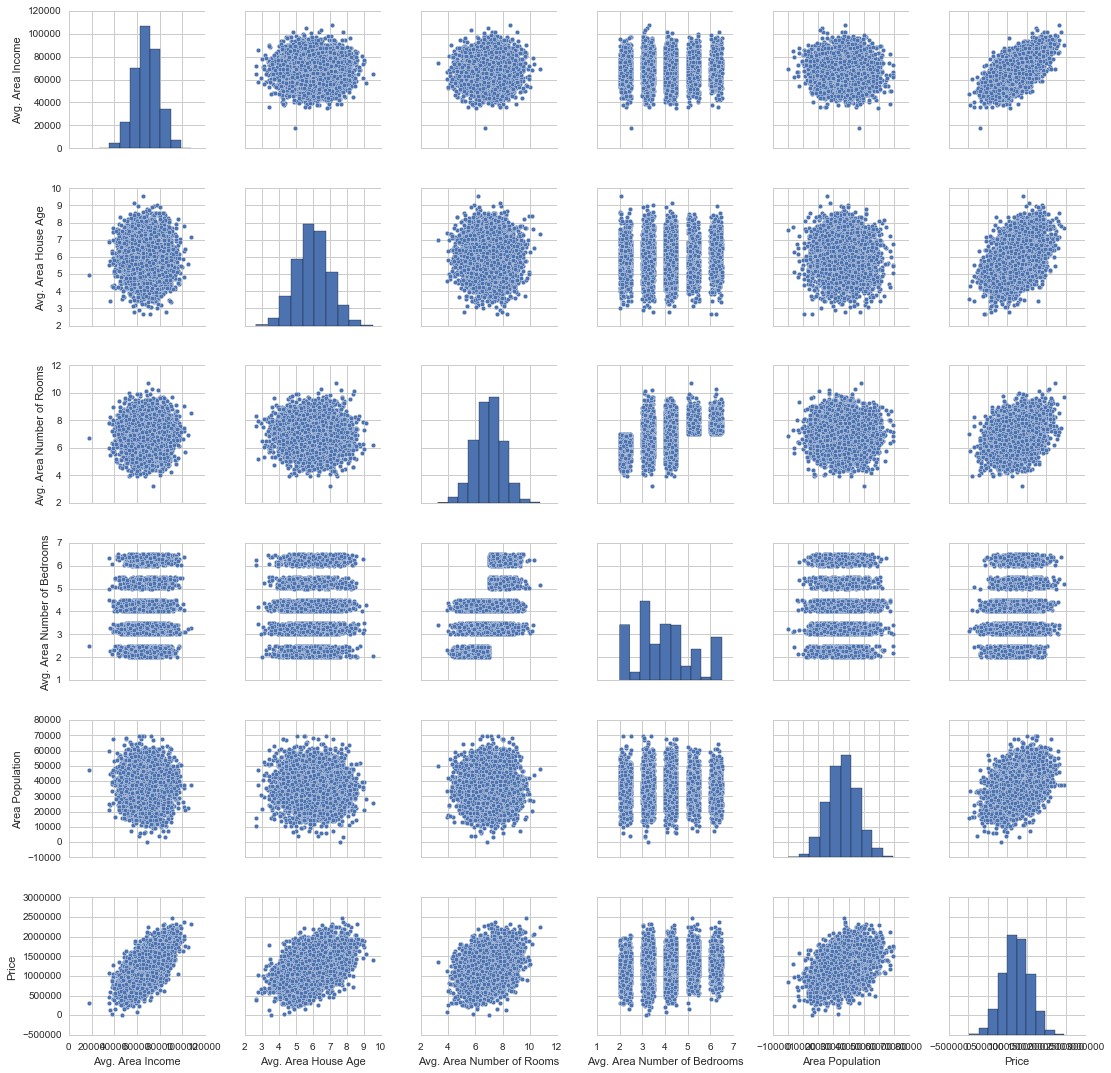

In [9]:
sns.pairplot(h)

Let's take a look at the 'Price' column with a seaborn distplot, following the convention below
> `sns.distplot(df['col'])`

/Library/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


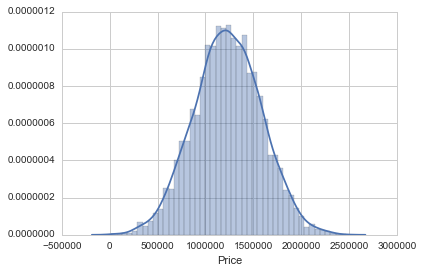

In [10]:
sns.distplot(h['Price'])

Create a heatmap of the correlations within the dataframe

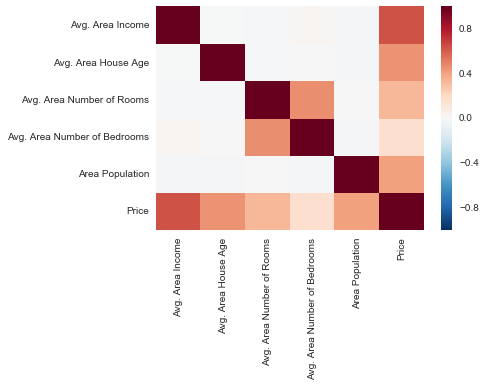

In [11]:
sns.heatmap(h.corr())

## Train a Linear Regression Model

### Set X and y arrays

In [12]:
X = h.drop(['Price', 'Address'], axis = 1)
y = h['Price']

### Train test split

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Create and train model
#### sklearn follows the convention: import, instantiate, fit

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate the model

Display coefficients

In [19]:
print(lm.coef_)

[  2.15898874e+01   1.66102501e+05   1.19895936e+05   1.90107101e+03
   1.52315025e+01]


Display intercept

In [18]:
print(lm.intercept_)

-2638142.11043


**Create a dataframe of coefficients**

In [20]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coeff_df

Coefficients
Avg. Area Income                  21.589887
Avg. Area House Age           166102.501246
Avg. Area Number of Rooms     119895.936402
Avg. Area Number of Bedrooms    1901.071012
Area Population                   15.231503

#### interpret coefficients

- Holdings all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.59
- ..
- ..

### Predictions from the model

In [45]:
predictions = lm.predict(X_test)

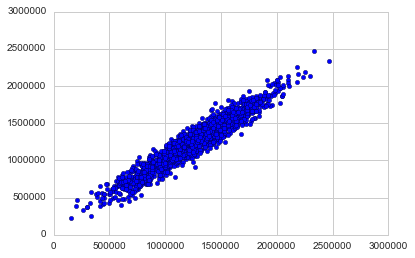

In [47]:
plt.scatter(y_test, predictions)

Create histogram of residuals

/Library/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


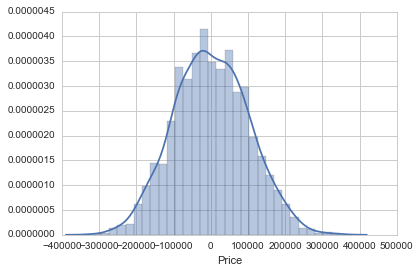

In [48]:
sns.distplot((y_test - predictions), bins = 30)

The above plot tells us that were on the right track. Ideally, the **plot of residuals is normally distributed**

### Plug in Regression Evaluation metrics

#### 3 most common evaluation metrics for regression are:
- **Mean Absolute Error (MAE)** -> Mean of the absolute value of the errors

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


- **Mean Squared Error (MSE)** -> Mean of the squared errors

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


- **Root Mean Squared Error (RMSE)** -> Square root of the mean of squared errors

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**NOTE** that these are **loss functions**, and we want to minimize them

Comparing error metrics

- **MAE** is the average error
- **MSE** is more popular than MAE, as it punishes larger errors
- **RMSE** even more popular that MSE, as RMSE is interpretable in the "y" units

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 80893.8119077
MSE: 10013679978.6
RMSE: 100068.376516
